In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F        # activation function
import matplotlib.pyplot as plt
plt.style.use('classic')
from IPython import display
%matplotlib inline

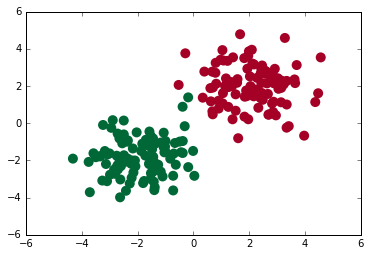

In [2]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)     #FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)       # LongTensor = 64-bit floating

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
class Net(torch.nn.Module):     # inherit torch  Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # inherit __init__ function
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer output
        self.out = torch.nn.Linear(n_hidden, n_output)       # output layer 

    def forward(self, x):
        # forward-propagating
        x = F.relu(self.hidden(x))      # activate function
        x = self.out(x)                 # output
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # output

In [4]:
net = Net(2, 10, 2)
print(net)  # net structure
# 二分类
# [0, 1]
# [1, 0] 

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [5]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

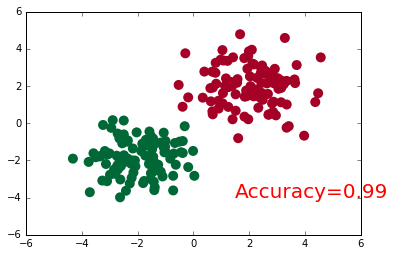

In [6]:
fig = plt.figure()
import time
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)